 **lab02**

Ở bài thực hành tuần này chúng ta sẽ làm quen với mạng Alexnet trên tập cifar10

cifar10 là một tập ảnh màu có 10 labels bao gồm:
*   airplane
*	automobile
*	bird
*	cat
*	deer
*	dog
*	frog
*	horse
*	ship
*	truck

In [ ]:
import numpy as np
import tensorflow as tf


In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

Khác với bài thực hành trước, bài này ta sẽ thực hành với ảnh màu

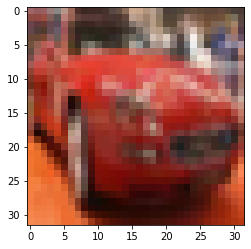

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
imgplot = plt.imshow(x_train[5])
plt.show()

In [ ]:
#Resize ảnh
X_train, X_test = X_train/255.0, X_test/255.0

#in dataset
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1)

#Model

Bài thực hành này ta sẽ làm quen với dạng Sequential của keras và các layer mới như dropout và batchnormalization

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization

np.random.seed(1000)

#Khởi tạo
AlexNet = Sequential()

#Block 1
AlexNet.add(Conv2D(filters=96, input_shape=(32,32,3), kernel_size=(11,11), strides=(4,4), padding='same')) #padding ="same" nghĩa là giữ 
                                                                                                        #nguyên kích thước ban đầu của input
AlexNet.add(Activation('relu')) #Có thể bỏ activation vào layer Conv như bài thực hành 1 cũng được
AlexNet.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same')) #Overlapping MaxPooling

#Block 2
AlexNet.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1,1), padding='same'))
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))

#Block 3
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(Activation('relu'))

#Block 4
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(Activation('relu'))

#Block 5
AlexNet.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))

#Flatten
AlexNet.add(Flatten())
# Lớp Fc1
AlexNet.add(Dense(4096))
AlexNet.add(Activation('relu'))
# Dropout
AlexNet.add(Dropout(rate=0.4))# rate: xác suất bị drop

#Lớp Fc2
AlexNet.add(Dense(4096))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Dropout
AlexNet.add(Dropout(rate=0.4))

#Lớp Fc3
AlexNet.add(Dense(1000))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Dropout
AlexNet.add(Dropout(rate=0.4))

#Lớp cuối cùng
AlexNet.add(Dense(10))
AlexNet.add(Activation('softmax'))

#Model Summary
AlexNet.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_75 (Conv2D)           (None, 8, 8, 96)          34944     
_________________________________________________________________
activation_45 (Activation)   (None, 8, 8, 96)          0         
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 4, 4, 96)          0         
_________________________________________________________________
conv2d_76 (Conv2D)           (None, 4, 4, 256)         614656    
_________________________________________________________________
activation_46 (Activation)   (None, 4, 4, 256)         0         
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 2, 2, 256)         0         
_________________________________________________________________
conv2d_77 (Conv2D)           (None, 2, 2, 384)        

Ta có 2 loại losses cho bài toán classification là categorical_crossentropy và sparse_categorical_crossentropy
* categorical_crossentropy nhận label dạng onehot
* sparse_categorical_crossentropy nhận label dạng các chữ số 

In [ ]:
AlexNet.compile(loss = tf.keras.losses.sparse_categorical_crossentropy, 
                optimizer= tf.keras.optimizers.Adam(learning_rate=5e-5), metrics=['accuracy'])

#Train

In [ ]:
### Tạo một callback ModelCheckpoint: callback này sẽ lưu model mỗi khi tìm được một model tốt hơn
#### filepath: đường dẫn file muốn lưu
#### monitor: đại lượng quyết định xem model có "tốt hơn" hay không
#### mode='auto'/'max'/'min': đại lượng monitor lớn hay nhỏ là tốt hơn
#### verbose: có thông báo mỗi lần lưu ko
#### save_best_only: chỉ lưu model tốt nhất
mc = keras.callbacks.ModelCheckpoint(filepath="epoch: {epoch:02d}.hdf5", 
                                     monitor='val_loss',
                                     mode='min', 
                                     verbose=0,
                                     save_best_only=False)

## Train  ## Khuyến cáo chạy COLAB (hoặc tương tự)
history = AlexNet.fit(X_train, y_train,
                    batch_size=512,
                    epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[mc])         ##sử dụng callback ModelCheckpoint trong quá trình train



Epoch 1/30
88/88 [==============================] - 6s 47ms/step - loss: 2.1861 - accuracy: 0.1854 - val_loss: 2.9498 - val_accuracy: 0.0934
Epoch 2/30
88/88 [==============================] - 4s 40ms/step - loss: 1.9935 - accuracy: 0.2136 - val_loss: 2.0486 - val_accuracy: 0.2160
Epoch 3/30
88/88 [==============================] - 3s 39ms/step - loss: 1.8114 - accuracy: 0.2961 - val_loss: 1.9357 - val_accuracy: 0.2650
Epoch 4/30
88/88 [==============================] - 3s 39ms/step - loss: 1.7149 - accuracy: 0.3377 - val_loss: 1.7594 - val_accuracy: 0.3364
Epoch 5/30
88/88 [==============================] - 3s 39ms/step - loss: 1.6133 - accuracy: 0.3775 - val_loss: 1.5932 - val_accuracy: 0.4008
Epoch 6/30
88/88 [==============================] - 3s 39ms/step - loss: 1.5441 - accuracy: 0.4208 - val_loss: 1.5185 - val_accuracy: 0.4362
Epoch 7/30
88/88 [==============================] - 3s 39ms/step - loss: 1.4736 - accuracy: 0.4541 - val_loss: 1.5988 - val_accuracy: 0.4182
Epoch 8/30
88

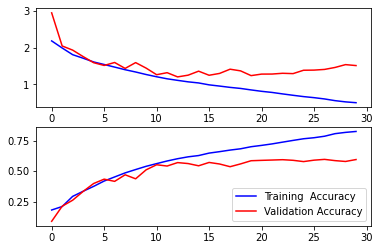

In [ ]:
#Vẽ thử đồ thị

f,ax=plt.subplots(2,1) 


ax[0].plot(history.history['loss'],color='b',label='Training Loss')
ax[0].plot(history.history['val_loss'],color='r',label='Validation Loss')


ax[1].plot(history.history['accuracy'],color='b',label='Training  Accuracy')
ax[1].plot(history.history['val_accuracy'],color='r',label='Validation Accuracy')

plt.legend()

In [ ]:
#ta chọn epoch thứ 10 làm best model
model = tf.keras.models.load_model("/content/epoch: 10.hdf5")
result = AlexNet.evaluate(X_test,y_test)
print("loss và accuracy trên tập test là {} {}".format(result[0],result[1]))

313/313 [==============================] - 1s 4ms/step - loss: 1.5893 - accuracy: 0.5854
loss và accuracy trên tập test là 1.5893319845199585 0.5853999853134155


#Bài tập 
Hãy code thử mạng VGG16 và nêu cách chọn ra epoch thứ bao nhiêu làm cho model tốt nhất 
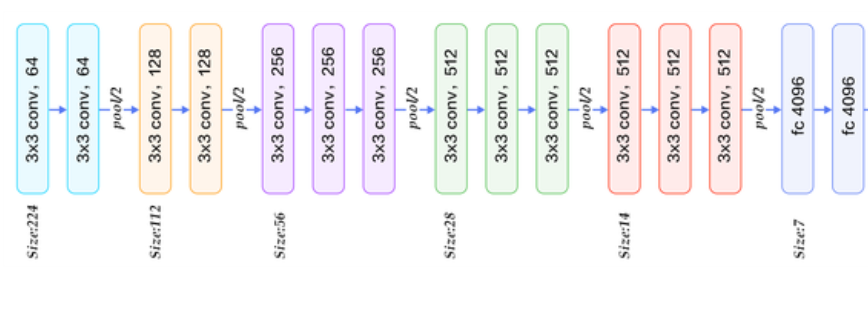
* Lưu lý:
1. Ta phải thêm vào lớp cuối để định nghĩa cho output
2. Ta phải code theo dạng Sequential

#Gợi ý

In [ ]:
model = Sequential()
#Block 1 của mạng vgg16
model.add(tf.keras.layers.Conv2D(filters=64,
                                 input_shape=(32,32,3),
                                 kernel_size=[3,3],
                                 strides=[1,1],
                                 padding="same",
                                 activation=tf.nn.relu))
model.add(tf.keras.layers.Conv2D(filters=64,
                                 kernel_size=[3,3],
                                 strides=[1,1],
                                 padding="same",
                                 activation=tf.nn.relu))
model.add(tf.keras.layers.MaxPooling2D(pool_size=[2,2],
                                         strides=[2,2]))
#Block cuối
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=4096, 
                              activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.5))
............................................